# Import Dependencies


In [1]:
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Question 1


In [2]:
lena = Image.open("lena512.bmp")


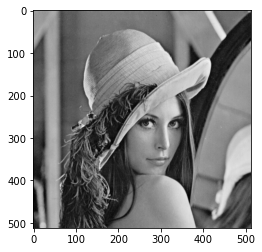

In [3]:
plt.imshow(lena, cmap="gray")


1: Resize (scale down) the grayscale lena image to half its original size. Then, resize (scale up) it up back to theoriginal size using resize() with PIL.Image.NEAREST


In [4]:
lena.size


(512, 512)

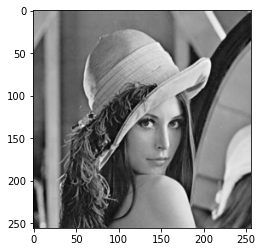

In [3]:
lena_half = lena.resize((256, 256))
plt.imshow(lena_half, cmap="gray")


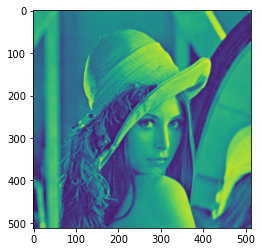

In [4]:
lena_nearest = lena_half.resize((512, 512), PIL.Image.NEAREST)
plt.imshow(lena_nearest, cmap="gray")


2: Resize (scale down) the grayscale lena image to half its original size. Then, resize (scale up) it up back to theoriginal size using resize() with PIL.Image.BILINEAR


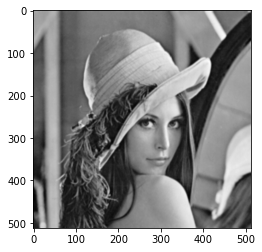

In [7]:
lena_bilinear = lena_half.resize((512, 512), PIL.Image.BILINEAR)
plt.imshow(lena_bilinear, cmap="gray")


3: Resize (scale down) the grayscale lena image to half its original size. Then, resize (scale up) it up back to the original size using resize() with PIL.Image.BICUBIC


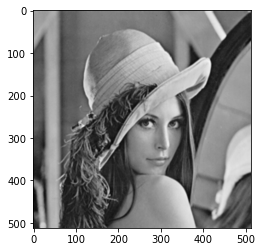

In [8]:
lena_bicubic = lena_half.resize((512, 512), PIL.Image.BICUBIC)
plt.imshow(lena_bicubic, cmap="gray")


5: Your script should display the results as follows using matplotlib along with the PSNR values w.r.t originalimage below the result images.


In [9]:
def PSNR(im1, im2):
    R2 = np.amax(im1) ** 2
    MSE = np.sum(np.power(np.subtract(im1, im2), 2))
    MSE /= im1.size[0] * im1.size[1]
    PSNR = 10 * np.log10(R2 / MSE)
    return PSNR


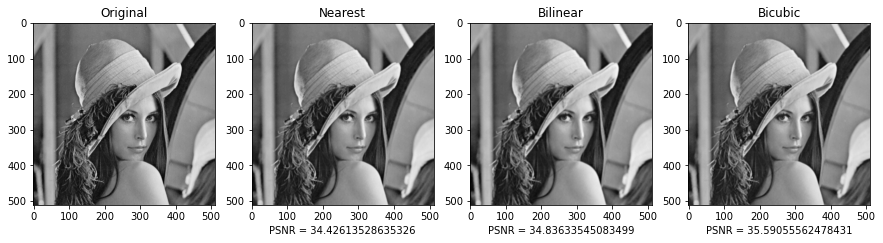

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(15, 10))
ax[0].imshow(lena, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(lena_nearest, cmap="gray")
ax[1].set_title("Nearest")
ax[1].set_xlabel("PSNR = " + str(PSNR(lena, lena_nearest)))
ax[2].imshow(lena_bilinear, cmap="gray")
ax[2].set_title("Bilinear")
ax[2].set_xlabel("PSNR = " + str(PSNR(lena, lena_bilinear)))
ax[3].imshow(lena_bicubic, cmap="gray")
ax[3].set_title("Bicubic")
ax[3].set_xlabel("PSNR = " + str(PSNR(lena, lena_bicubic)))

plt.show()


### Question 2


In [11]:
def ch_swap(im):
    im = np.array(im)
    im = im[:, :, ::-1]
    return Image.fromarray(im)


In [12]:
red_eye_kid = Image.open("PA1_Images\kidred.jpg")


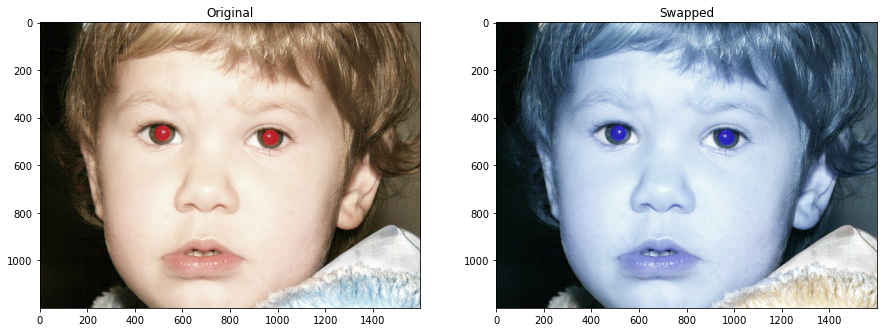

In [13]:
swap_kid = ch_swap(red_eye_kid)
# show images side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(red_eye_kid)
ax[0].set_title("Original")
ax[1].imshow(swap_kid)
ax[1].set_title("Swapped")
plt.show()


### Question 3


In [14]:
red_eye_effect = Image.open("PA1_Images/Red-eye_effect.png")
red_eye_image = Image.open("PA1_Images/redeye.jpg")
red_eye_baby = Image.open("PA1_Images/redeyebaby.jpg")


In [15]:
def plot_all(func):
    fig, ax = plt.subplots(2, 4, figsize=(15, 10))
    ax[0, 0].imshow(red_eye_effect)
    ax[0, 1].imshow(red_eye_image)
    ax[0, 2].imshow(red_eye_baby)
    ax[0, 3].imshow(red_eye_kid)
    ax[1, 0].imshow(func(red_eye_effect))
    ax[1, 1].imshow(func(red_eye_image))
    ax[1, 2].imshow(func(red_eye_baby))
    ax[1, 3].imshow(func(red_eye_kid))
    plt.show()


In [28]:
def red_eye_removal(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[im > 200] = 255
    im[im <= 200] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


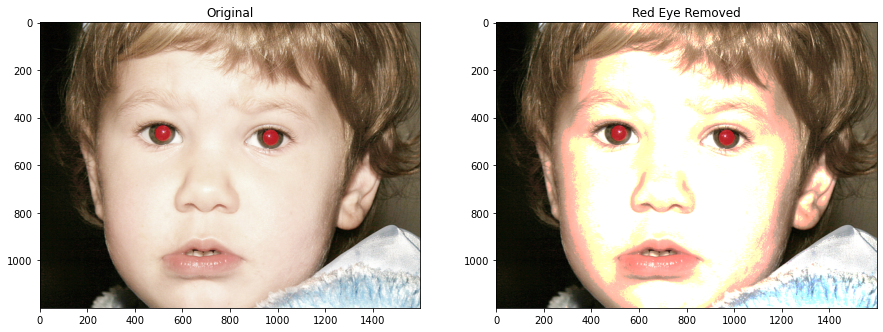

In [27]:
remove_kid = red_eye_removal(red_eye_kid)
# show images side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(red_eye_kid)
ax[0].set_title("Original")
ax[1].imshow(remove_kid)
ax[1].set_title("Red Eye Removed")
plt.show()


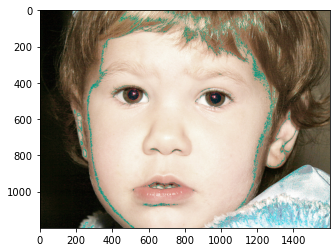

In [18]:
def red_eye_removal2(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[:, :, 0][(im[:, :, 0] > 180) & (im[:, :, 0] <= 190)] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plt.imshow(red_eye_removal2(red_eye_kid))


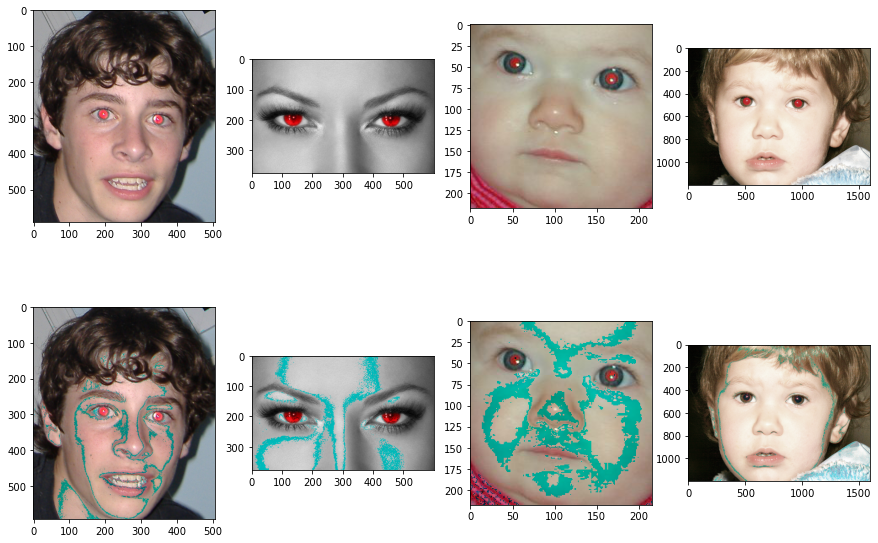

In [19]:
plot_all(red_eye_removal2)


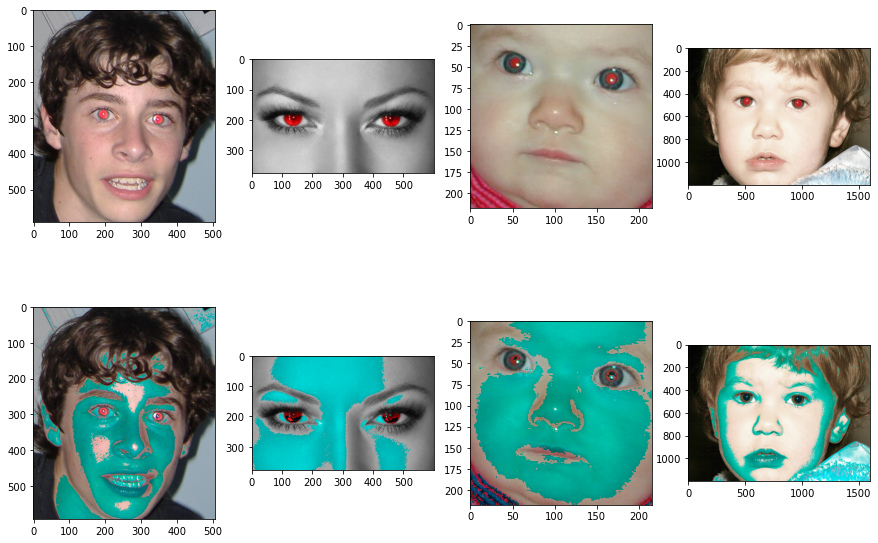

In [20]:
def red_eye_removal3(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[:, :, 0][(im[:, :, 0] > 170) & (im[:, :, 0] <= 230)] = 00
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal3)


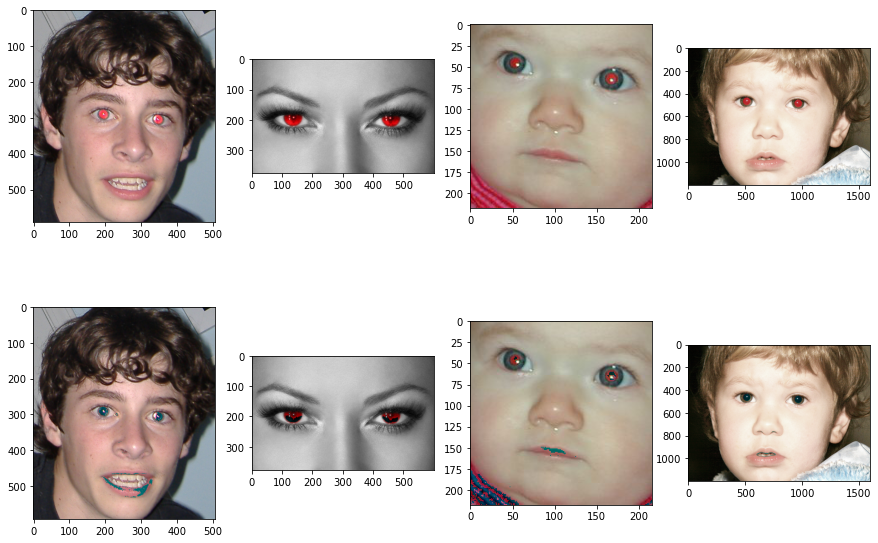

In [21]:
def red_eye_removal4(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[:, :, 0][(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal4)


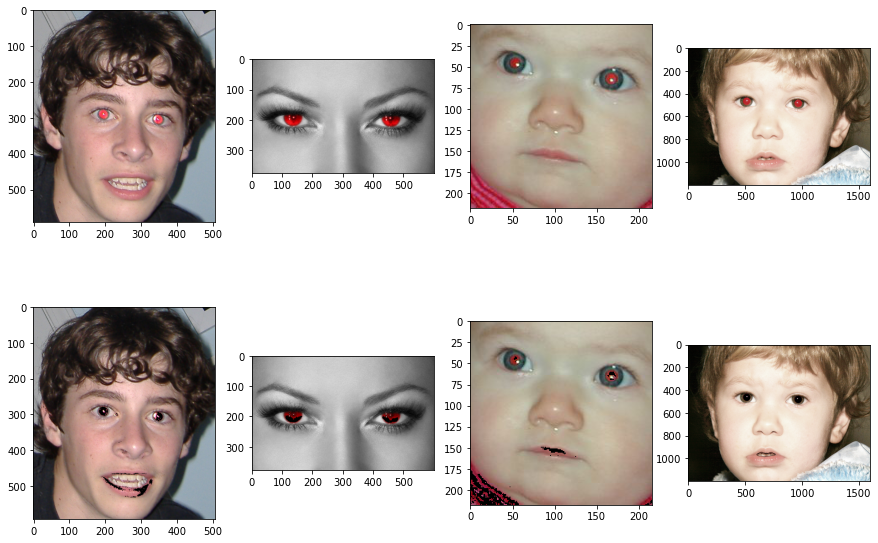

In [22]:
def red_eye_removal5(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 0
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal5)


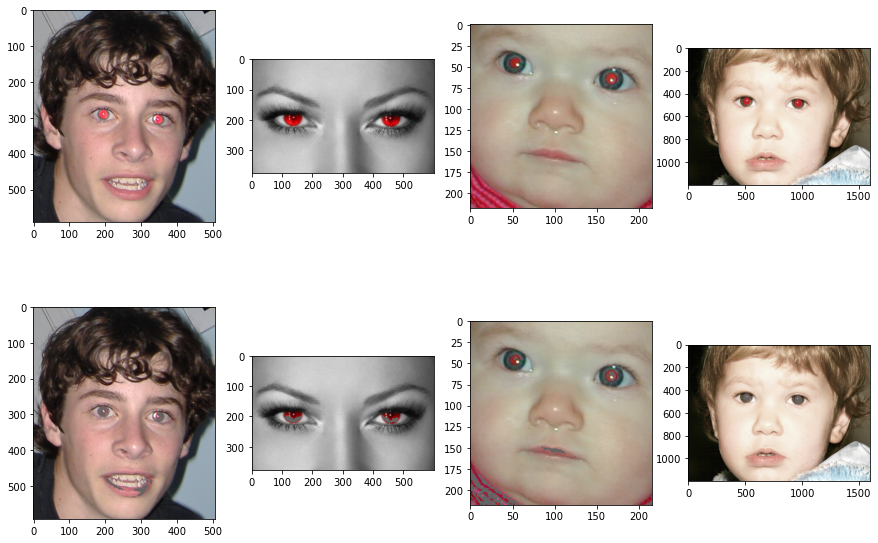

In [23]:
def red_eye_removal_final(im):
    im = np.array(im)
    im = im.astype(np.float64)
    im[(im[:, :, 0] > 170) & (im[:, :, 2] <= 120) & (im[:, :, 1] <= 120)] = 100
    im = im.astype(np.uint8)
    return Image.fromarray(im)


plot_all(red_eye_removal_final)
